# Blood Cell Data

This project uses a dataset containing 17,092 images of normal blood cells from healthy individuals with no infection or disease.  It includes eight types of cells: neutrophils, eosinophils, basophils, lymphocytes, monocytes, immature granulocytes, erythroblasts, and platelets. The labels were annotated bt a licensed pathologist.

The team will build machine learning models that make predictions wether a blood cell is a particular type of cell.

[Link to colab](https://colab.research.google.com/drive/1evjUZBY632KIEA0R6pHefQUzPQ0r_5uQ?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from io import BytesIO
from zipfile import ZipFile
from time import time
import sklearn
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib.image import imread
import glob
import cv2
from sklearn import cluster, decomposition
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [2]:
path = "bloodcells_dataset"
print("\nRetrieving blood cell images from:")
print(path)

# Glob to search recursively within path
folders = glob.glob(os.path.join(path, '**'), recursive=True) #  finds all the pathnames matching a specified pattern
i = 0
cell_col = []

for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        i = i +1
        cell_col.append(f)

img_count = str(i)
print("\nBlood bell images found: " + str(i))


Retrieving blood cell images from:
bloodcells_dataset

Blood bell images found: 17092


In [3]:
# Save matrix
# cell_col = np.array(cell_col)
# np.save('cell_matrix.npy', cell_col)

In [4]:
# Load matrix
cell_col = np.load('cell_matrix.npy')

In [5]:
# Dictionary to store one image path per folder
folder_image_dict = {}

# Loop through each folder and subfolder
for folder in folders:
    # Check if it is a directory
    if os.path.isdir(folder):
        print("Checking folder:", folder)
        # Find all .jpg files in the current folder
        jpg_files = glob.glob(os.path.join(folder, '*.jpg'))
        if jpg_files:
            # Store the first image found in the current folder
            folder_image_dict[folder] = jpg_files[0]

Checking folder: bloodcells_dataset\
Checking folder: bloodcells_dataset\basophil
Checking folder: bloodcells_dataset\eosinophil
Checking folder: bloodcells_dataset\erythroblast
Checking folder: bloodcells_dataset\ig
Checking folder: bloodcells_dataset\lymphocyte
Checking folder: bloodcells_dataset\monocyte
Checking folder: bloodcells_dataset\neutrophil
Checking folder: bloodcells_dataset\platelet


In [6]:
def plot_images_from_folders(folder_image_dict, convert_to_rgb=False, convert_to_gray=False):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
    axes = axes.flatten()

    for i, (folder, img_path) in enumerate(folder_image_dict.items()):
        if i >= 8:  # Plot 8 images
            break
        
        img = cv2.imread(img_path)  # Load the image from the specified file
        
        if convert_to_gray:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert the image to grayscale if True
            axes[i].imshow(img, cmap='gray')  # Display the image in grayscale
        elif convert_to_rgb:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB if True
            axes[i].imshow(img)  # Display the image in RGB
        else:
            axes[i].imshow(img)  # Display the original image
        
        axes[i].set_title(os.path.basename(folder))  # Set the title as the folder name
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

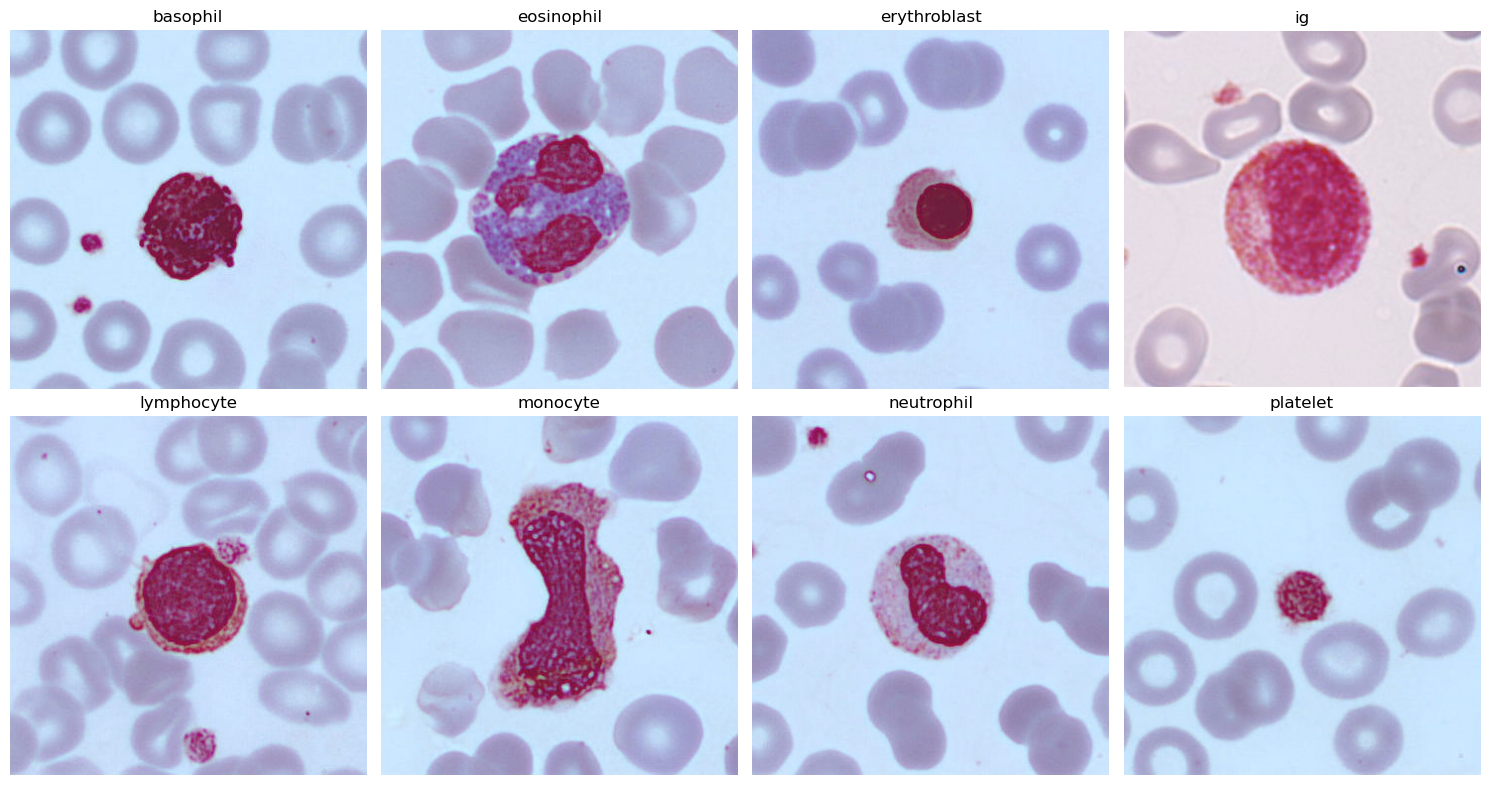

In [7]:
plot_images_from_folders(folder_image_dict)

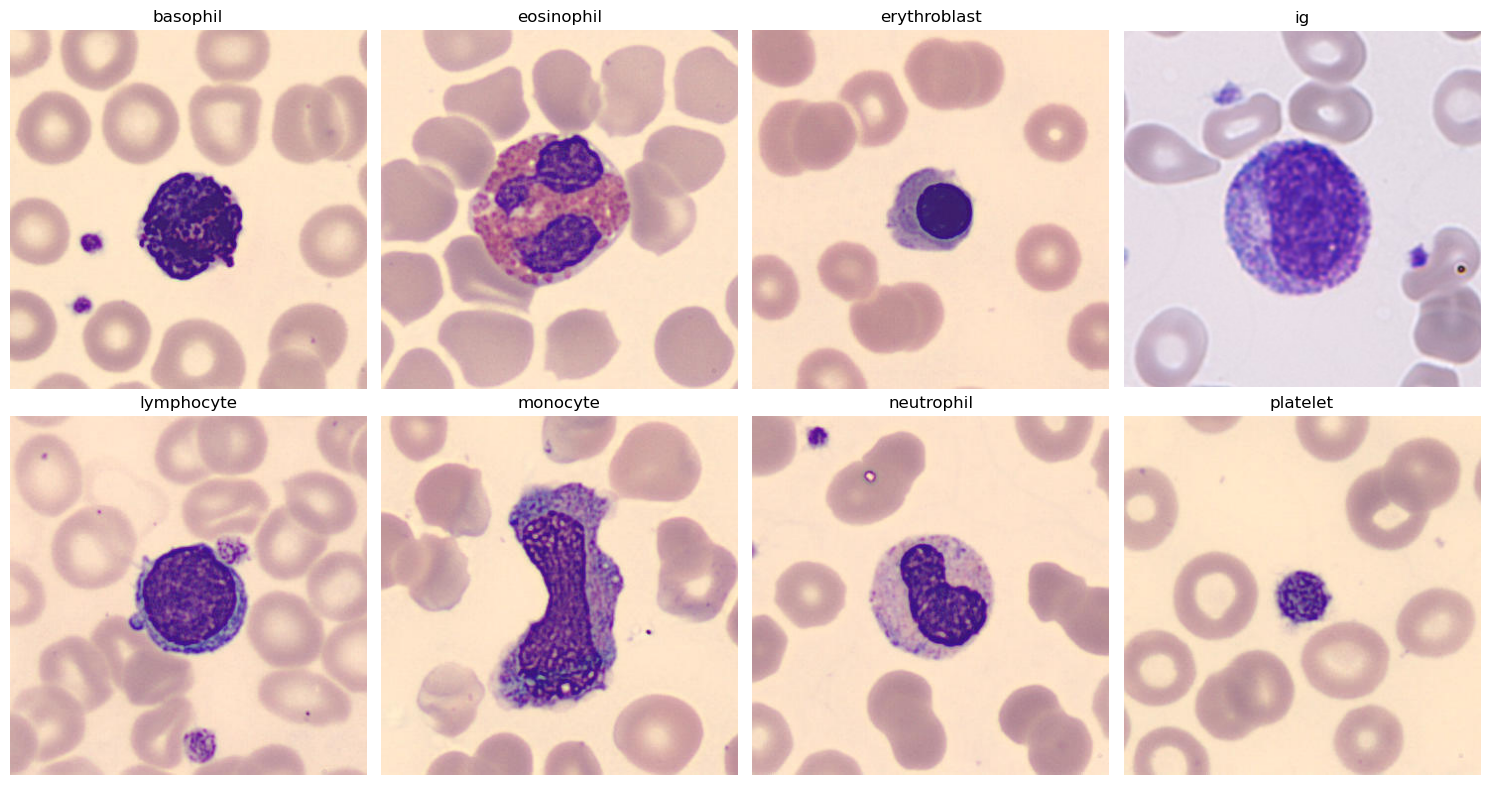

In [8]:
plot_images_from_folders(folder_image_dict, convert_to_rgb=True)

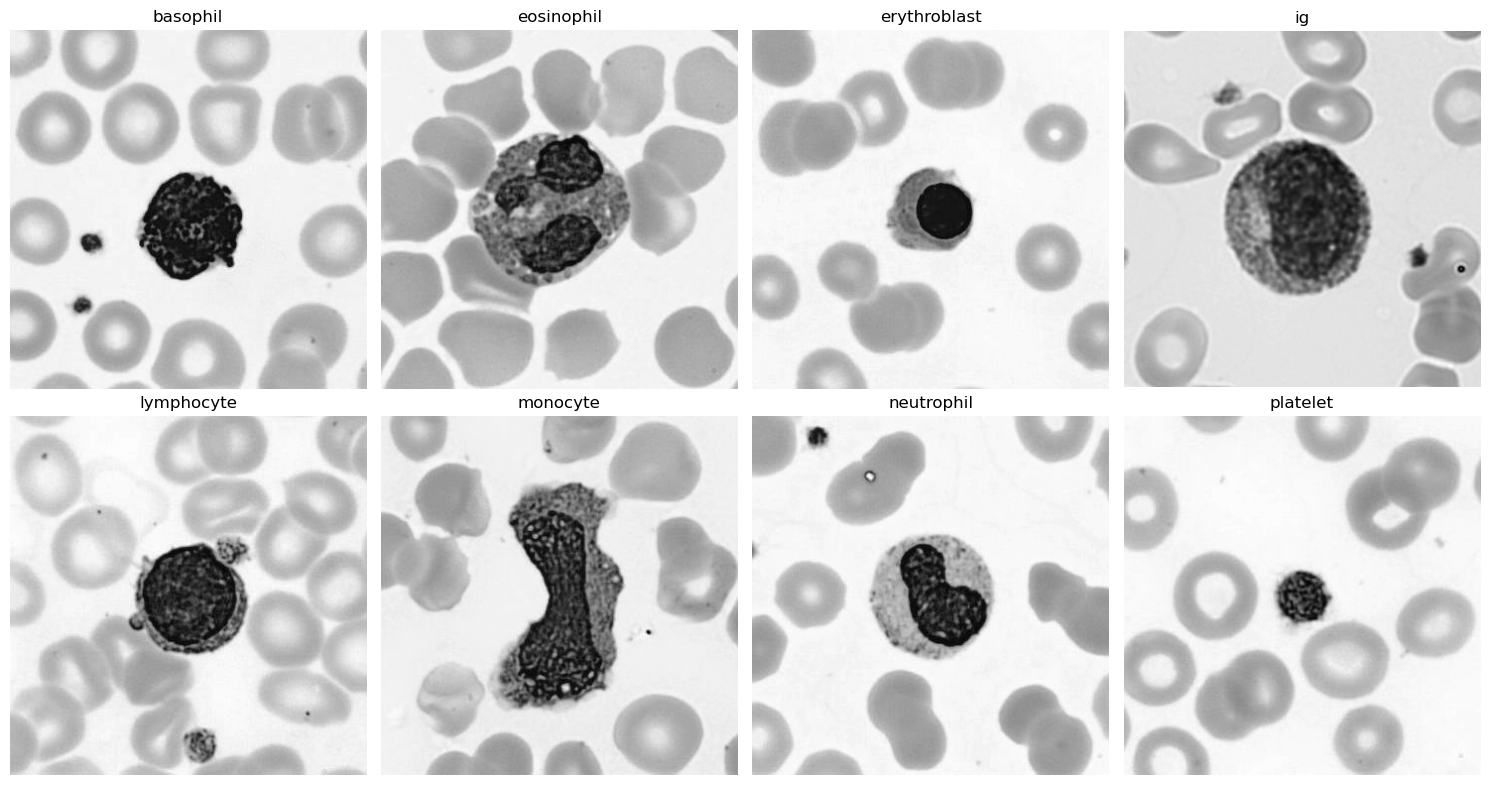

In [9]:
plot_images_from_folders(folder_image_dict, convert_to_gray=True)

## Data Preprocessing

In [11]:
# Define the target shape (height, width)
target_shape = (64, 64)

cell_col_num = []

for i in range(0, 17092):
    # Read and convert the image to grayscale
    image = imread(cell_col[i])
    grayscale_image = rgb2gray(image)
    # Resize the grayscale image to the target shape
    resized_image = resize(grayscale_image, target_shape, anti_aliasing=True)
    # Append the resized image to the list
    cell_col_num.append(resized_image)

# Convert the list to a NumPy array
cell_col_num = np.array(cell_col_num)

print(cell_col_num.shape)

(17092, 64, 64)


In [12]:
# Save matrix
np.save('cell_matrix2.npy', cell_col_num)

In [13]:
cell_col_num = np.load('cell_matrix2.npy')
print(cell_col_num.shape)

(17092, 64, 64)


In [14]:
cell_col_num = np.array(cell_col_num)
cell_resh = cell_col_num.reshape(cell_col_num.shape[0], cell_col_num.shape[1] * cell_col_num.shape[1])

cell_centered = cell_resh - cell_resh.mean(axis=0)
cell_centered -= cell_centered.mean(axis=1).reshape(cell_col_num.shape[0], -1)

In [16]:
# Select number of components
# Use eigenvalues
# Use PCA and cross-validation

cv_scores = []
for i in range(0,16):
    pca = PCA(svd_solver='full', n_components=i)
    print('n_components = %d' % i)
    cv_scores.append(cross_val_score(pca, cell_centered, n_jobs=2).mean())

n_components = 0
n_components = 1
n_components = 2
n_components = 3
n_components = 4
n_components = 5
n_components = 6
n_components = 7
n_components = 8
n_components = 9
n_components = 10
n_components = 11
n_components = 12
n_components = 13
n_components = 14
n_components = 15


In [17]:
# Save list
# np.save('saved_cv_scores.npy', cv_scores)

In [20]:
saved_scores = np.load('saved_cv_scores.npy')
print(saved_scores)

[2684.43382434 2896.36202074 3043.45717041 3108.18121499 3155.64474802
 3199.8825142  3290.54797532 3329.77126634 3364.12817342 3398.53801801
 3431.17937987 3463.54908786 3493.59792415 3522.15336453 3550.03403356
 3578.8923287 ]


In [24]:
# Save array
# np_cv_scores = np.array(cv_scores)
# np.save('np_cv_scores.npy', np_cv_scores)

In [25]:
np_cv_scores = np.load('np_cv_scores.npy')
np_cv_scores

array([2684.43382434, 2896.36202074, 3043.45717041, 3108.18121499,
       3155.64474802, 3199.8825142 , 3290.54797532, 3329.77126634,
       3364.12817342, 3398.53801801, 3431.17937987, 3463.54908786,
       3493.59792415, 3522.15336453, 3550.03403356, 3578.8923287 ])

In [26]:
type(np_cv_scores)

numpy.ndarray

In [27]:
pca = PCA(svd_solver='full', n_components=16)
pca.fit(cell_centered)

PCA(n_components=16, svd_solver='full')

In [43]:
rec_error = pd.DataFrame({
    'n_components': np.arange(0,16),
    'reconst error': cv_scores,
    'explained var ratio': pca.explained_variance_ratio_})

rec_error

,n_components,reconst error,explained var ratio
0,0,2684.433824,0.125423
1,1,2896.362021,0.047201
2,2,3043.457170,0.024395
3,3,3108.181215,0.019752
4,4,3155.644748,0.018143
5,5,3199.882514,0.017110
6,6,3290.547975,0.015542
7,7,3329.771266,0.013412
8,8,3364.128173,0.013166
9,9,3398.538018,0.012546


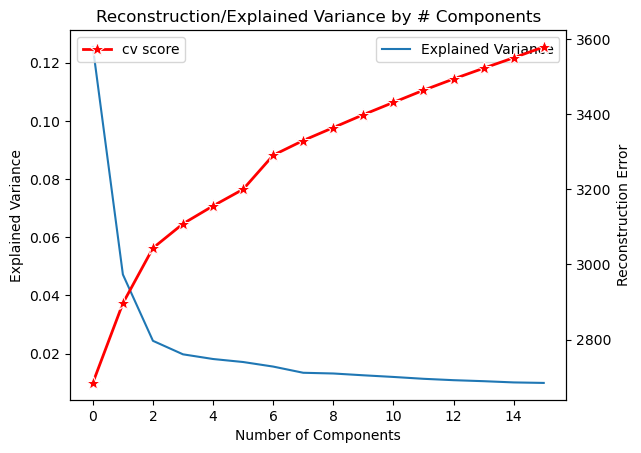

In [44]:
fig, ax = plt.subplots()
sns.lineplot(x=rec_error['n_components'], y=rec_error['explained var ratio'],
             ax=ax, label='Explained Variance')

ax2 = ax.twinx()
sns.lineplot(x=rec_error['n_components'], y=rec_error['reconst error'],
             legend=True, marker= '*', markersize=10, color='red', linewidth=2,
             ax=ax2, label='cv score')
plt.title('Reconstruction/Explained Variance by # Components')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Explained Variance')
ax2.set_ylabel('Reconstruction Error')
plt.show()

In [1]:
## Classification